# Crop Recommendation system using Machine Learning

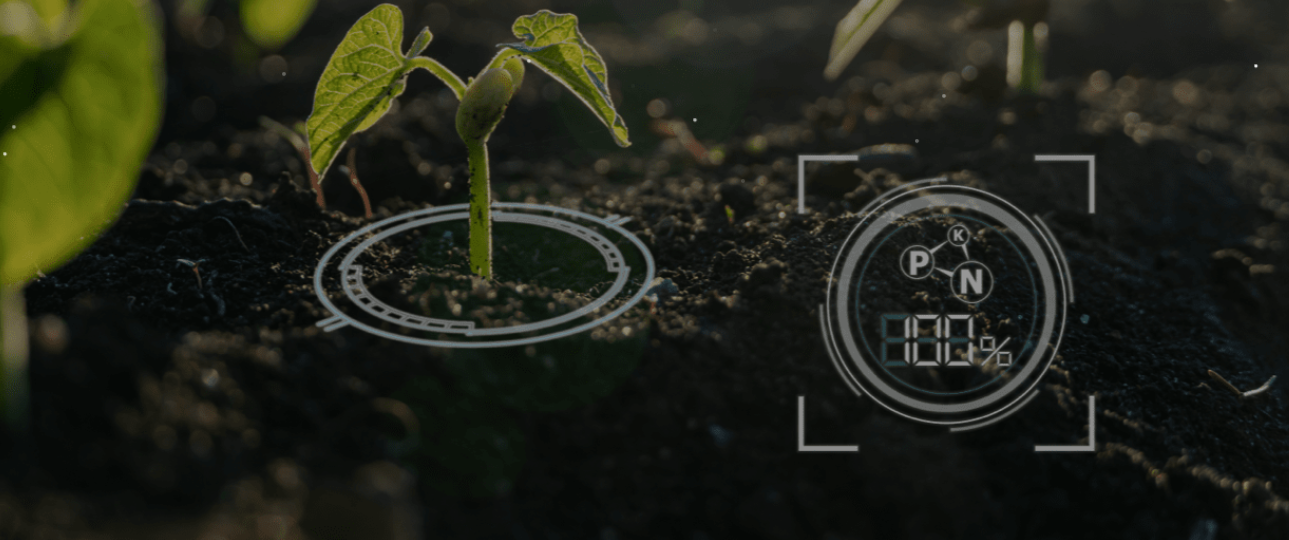

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
#Reading the file
df = pd.read_csv('Crop_Recommendation.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


# Data Analysis and Visulization

In [3]:
df.shape

(2200, 8)

In [5]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# Unique values for Crop
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [9]:
df.Crop.value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

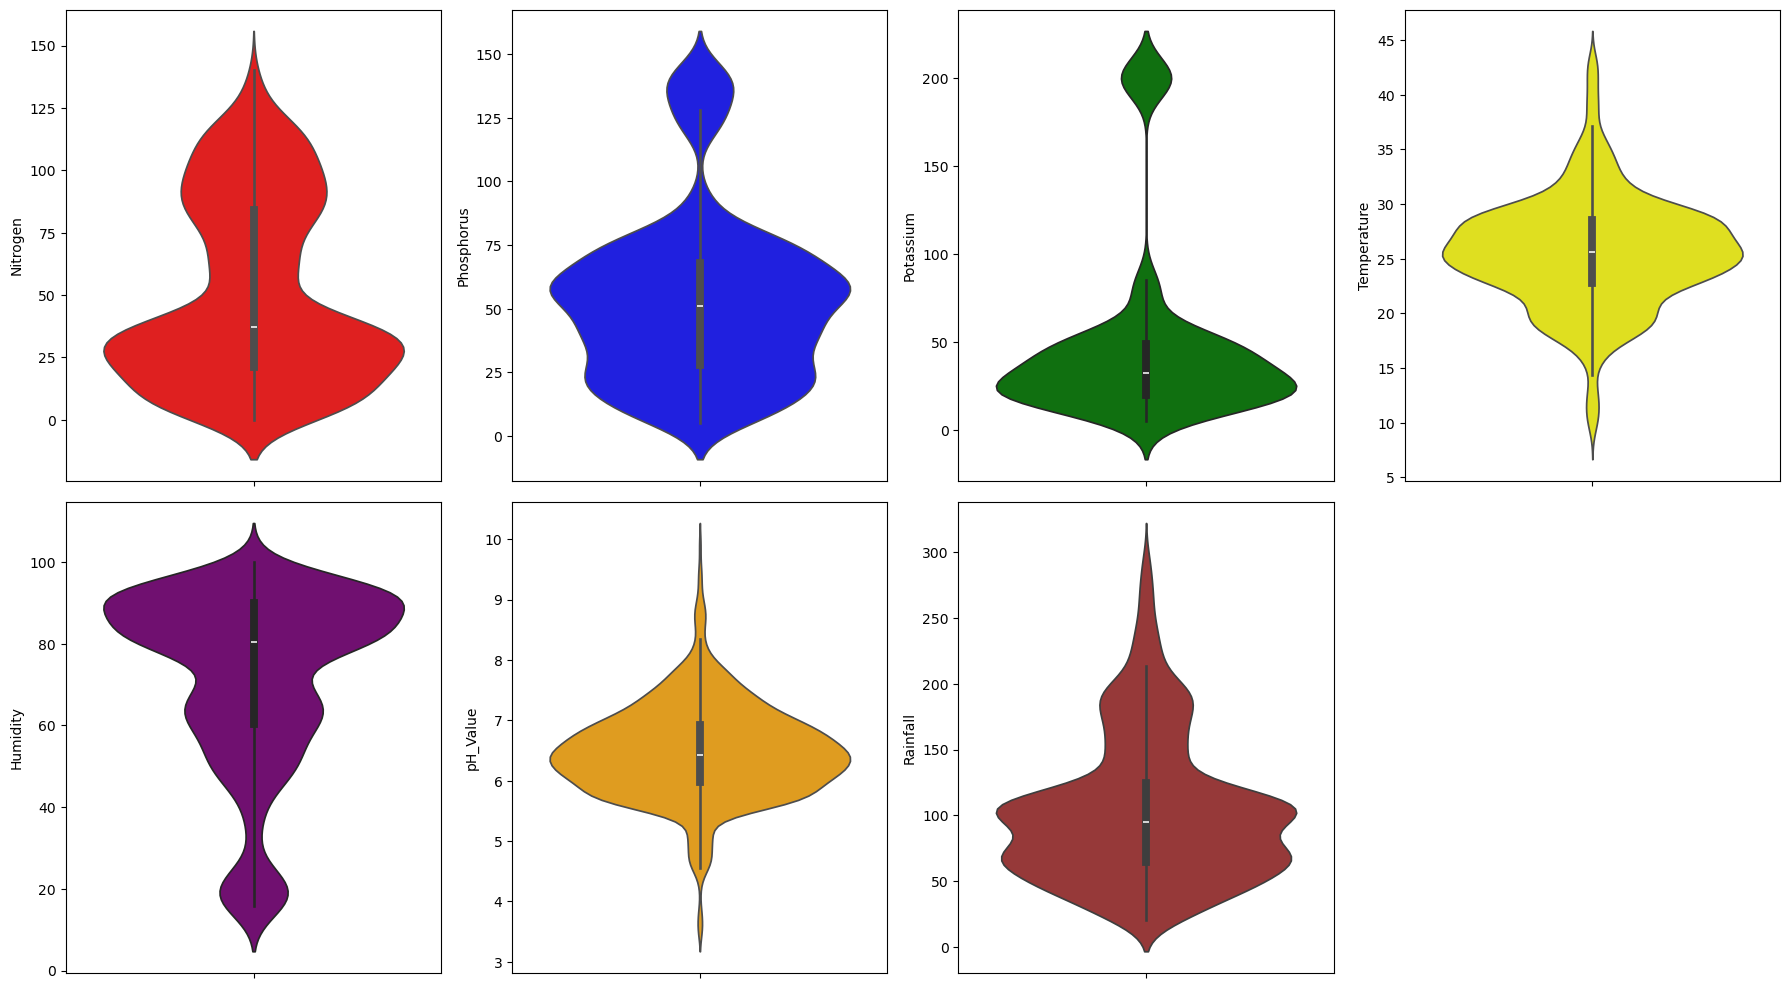

In [16]:
fig, axes = plt.subplots(nrows = 2,ncols = 4,figsize = (18,10))

sns.violinplot(data = df, y = 'Nitrogen',ax = axes[0,0], color = 'red')
sns.violinplot(data = df, y = 'Phosphorus',ax = axes[0,1],color = 'blue' )
sns.violinplot(data = df, y = 'Potassium',ax = axes[0,2],color = 'green')
sns.violinplot(data = df, y = 'Temperature',ax = axes[0,3],color = 'yellow')
sns.violinplot(data = df, y = 'Humidity',ax = axes[1,0],color = 'purple')
sns.violinplot(data = df, y = 'pH_Value',ax = axes[1,1],color = 'orange')
sns.violinplot(data = df, y = 'Rainfall',ax = axes[1,2],color = 'brown')
axes[1,3].axis('off')
plt.tight_layout()

plt.show()

# Distribution of metrics among different Crops

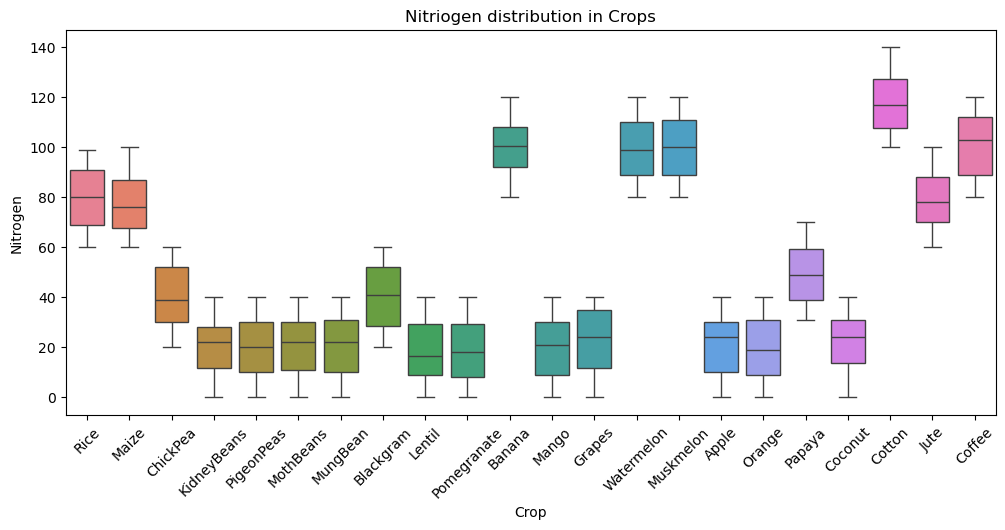

In [23]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = 'Nitrogen', x = 'Crop', hue = 'Crop')
plt.xticks(rotation = 45)
plt.title('Nitrogen distribution in Crops')
plt.show()

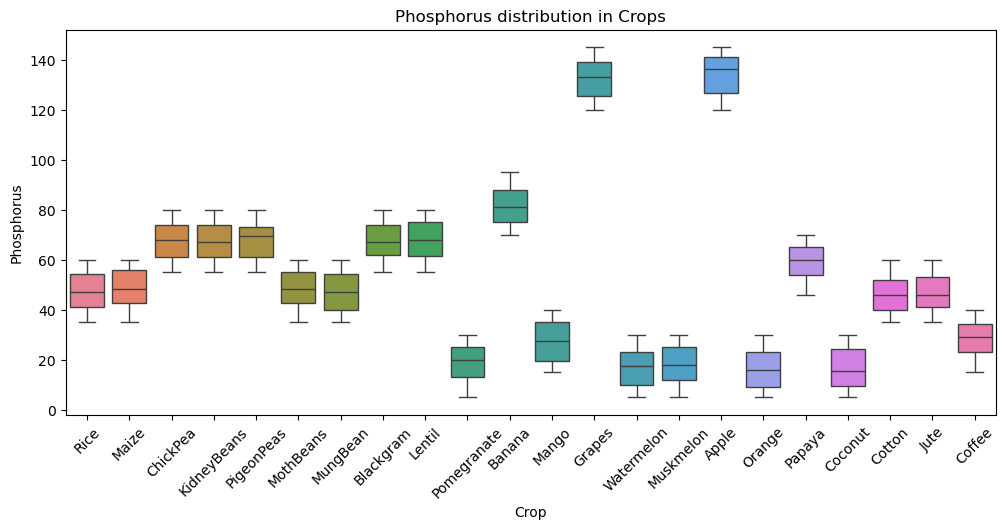

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = 'Phosphorus', x = 'Crop', hue = 'Crop')
plt.xticks(rotation = 45)
plt.title('Phosphorus distribution in Crops')
plt.show()

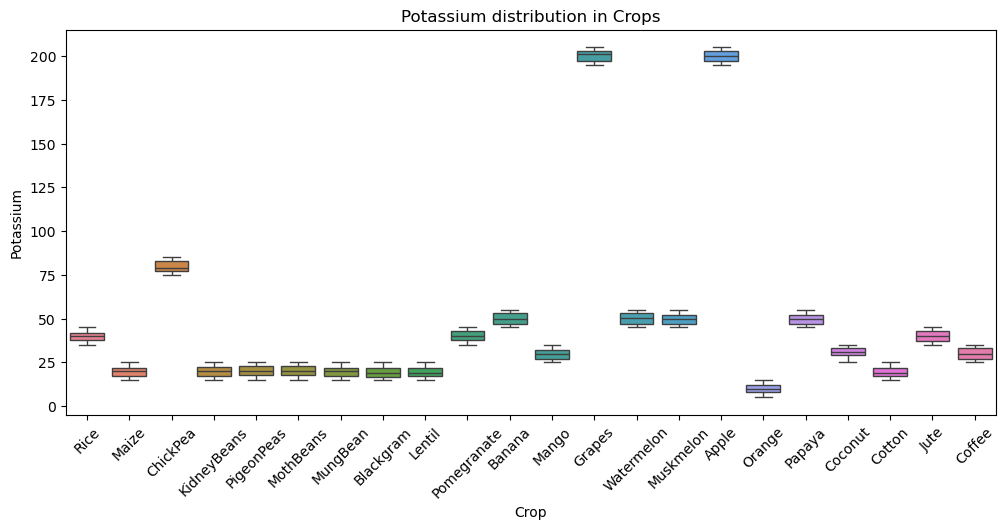

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = 'Potassium', x = 'Crop', hue = 'Crop')
plt.xticks(rotation = 45)
plt.title('Potassium distribution in Crops')
plt.show()

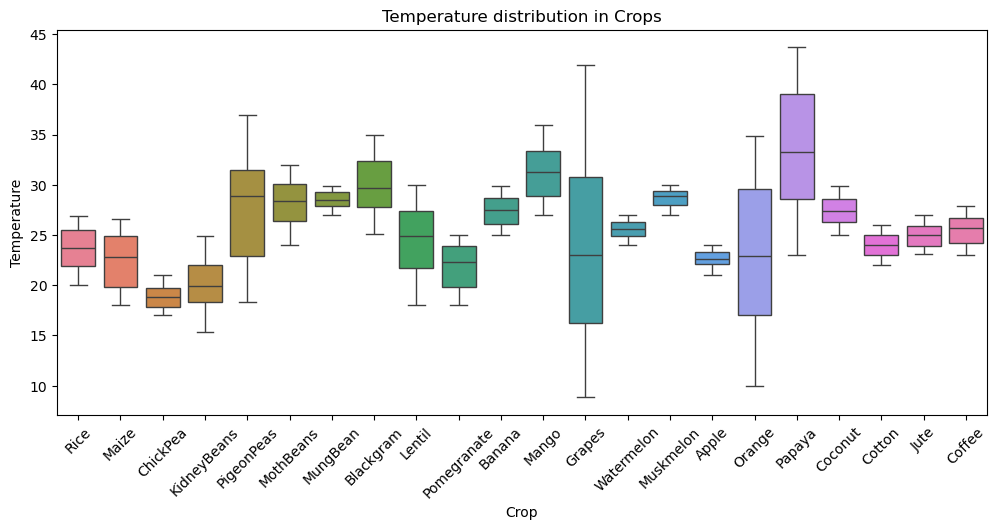

In [26]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = 'Temperature', x = 'Crop', hue = 'Crop')
plt.xticks(rotation = 45)
plt.title('Temperature distribution in Crops')
plt.show()

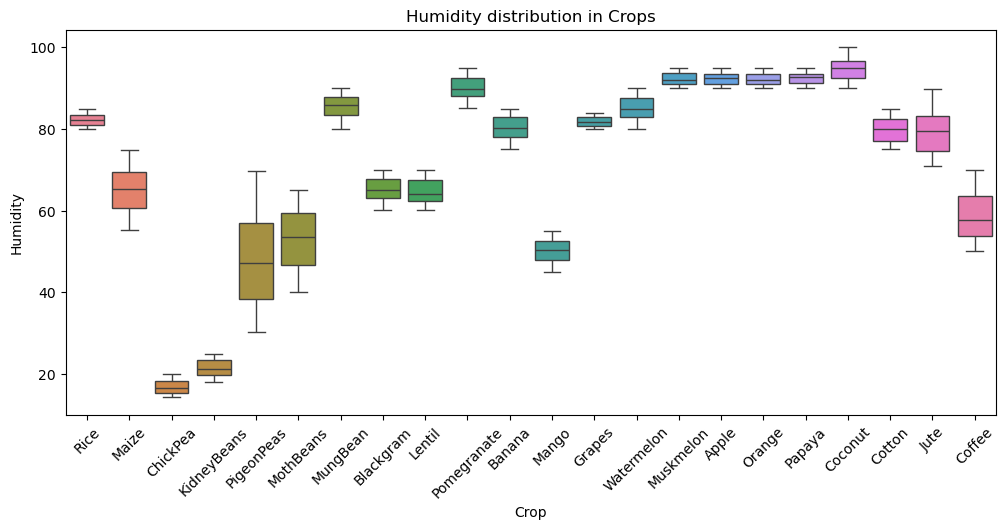

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = 'Humidity', x = 'Crop', hue = 'Crop')
plt.xticks(rotation = 45)
plt.title('Humidity distribution in Crops')
plt.show()

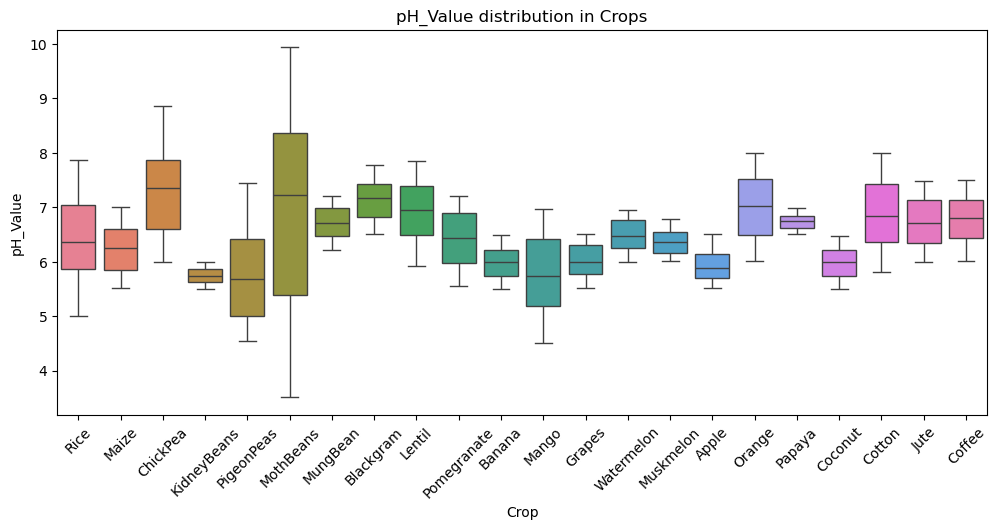

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = 'pH_Value', x = 'Crop', hue = 'Crop')
plt.xticks(rotation = 45)
plt.title('pH_Value distribution in Crops')
plt.show()

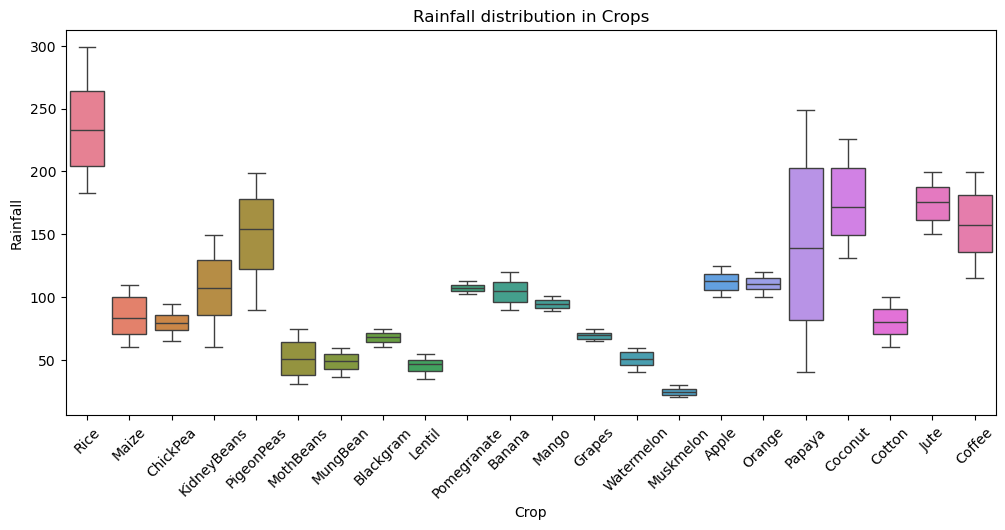

In [29]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = 'Rainfall', x = 'Crop', hue = 'Crop')
plt.xticks(rotation = 45)
plt.title('Rainfall distribution in Crops')
plt.show()

# Obseravtions

Crops like ChickPea,KidneyBeans,MothPea,etc require low Nitrogen, while Rice, Maize, etc require moderate and Cotton and Coffee require hight amounts

Crops like Pomegranate,Orange,Mango,etc require low Phosphorus, while Lentil, Banana, etc require moderate and Grapes and Apple require hight amounts

Amount of potassium required is much more specific as compared to Nitrogen and Phosporus

Maize,Orange,etc require low Potassium, ChickPea, Watermelon require moderate whereas Grapes and Apple require high Potassium content

Most crops grow near the room temperature, ChickPea grows at slightly lower temperatures while Muskmelon grows at slightly higher temperature

Grapes and Oranges are tolerant to high and low temperatures whereas Papaya is toleratn to high temperatures only.

Most of the crops require high humidity. Some crops like ChickPea and KidneyBeans grow in low humidity. Lentil and Pmegranate require moderate humidity.

Crops generally prefer the near neutral zone of 6-8pH. MothPeas are tolerant to variations in the pH value

Different crops require different amounts of rainfall with Rice requiring the most and Muskmelon requiring the least.

Papaya is the most tolerant to changes in rainfall.

# Converting Non Numerical labels into Numerical ones

In [30]:
label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])

# Segregating feature and Target/ Independent and dependent variable

In [31]:
X = df.drop(['Crop'],axis=1)
Y = df['Crop']

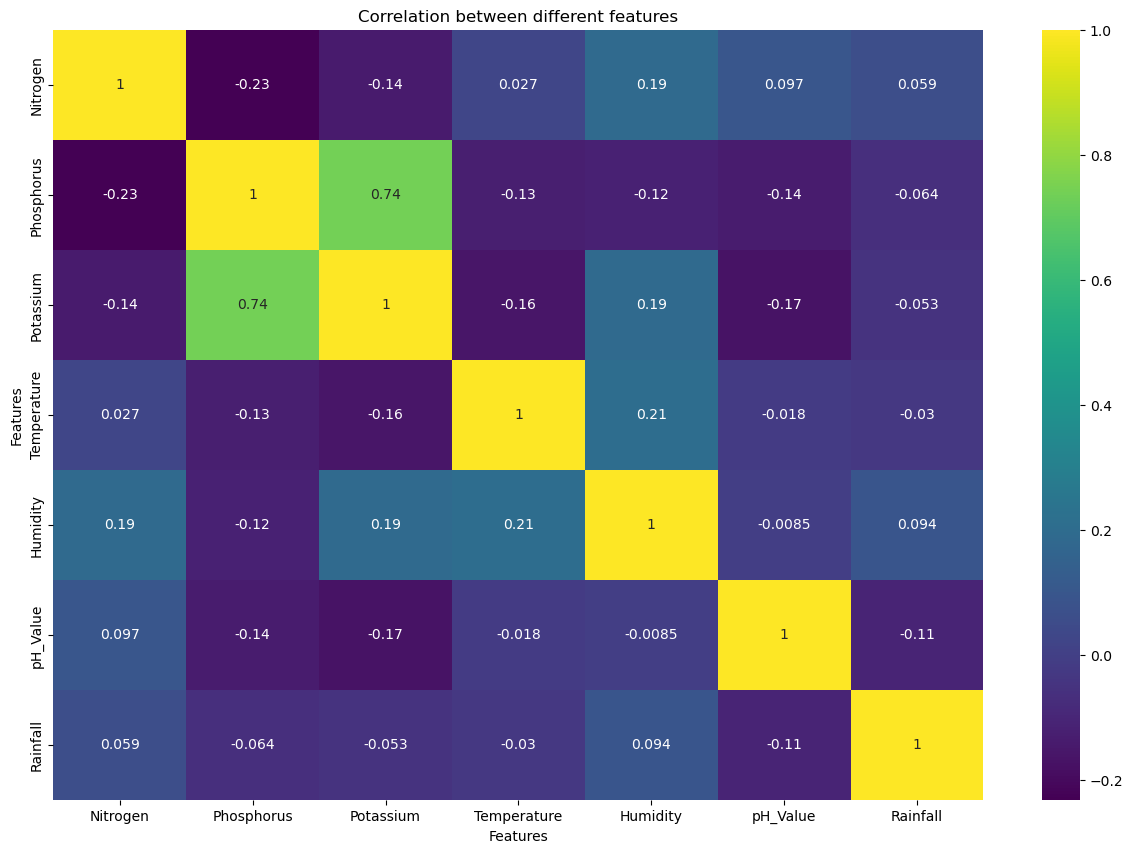

In [33]:
fig,ax = plt.subplots(figsize = (15,10))

sns.heatmap(X.corr(),annot = True, cmap = 'viridis')

ax.set(xlabel = 'Features')
ax.set(ylabel = 'Features')

plt.title('Correlation between different features')
plt.show()

The features are largely independent of each other.

# Spliting the training and testing data

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)

# Training the Model
Model used : Logistic regression

In [35]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_pred_lr,y_test)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model used : Support Vector Classifier

In [36]:
model_svc = SVC()
model_svc.fit(X_train,y_train)

y_pred_svc = model_svc.predict(X_test)
acc_svc = accuracy_score(y_pred_svc,y_test)

Model used : Decison tree Classifier

In [37]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_pred_dt,y_test)

Model used : Random Forest Classifier

In [38]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_pred_rf,y_test)

# Accuracy Scores comparison

In [40]:
print("The accuracy for Logistic Regression is : {0:0.4f}".format(acc_lr))
print("The accuracy for Support Vector Machine is : {0:0.4f}".format(acc_svc))
print("The accuracy for Decision Tree is : {0:0.4f}".format(acc_dt))
print("The accuracy for Random Forest is : {0:0.4f}".format(acc_rf))

The accuracy for Logistic Regression is : 0.9682
The accuracy for Support Vector Machine is : 0.9773
The accuracy for Decision Tree is : 0.9932
The accuracy for Random Forest is : 0.9977


# Conclusion 
Random Forest Classifier Model gives the most accurate predictions